In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [151]:
data2 = pd.read_csv('data2.csv')
B = np.array(data2['ch1'])/np.max(np.array(data2['ch1']))
H = np.array(data2['ch0'])*150/0.24
data2


,time,ch0,ch1
0,00:00:00.000.000,0.3296,-0.6055
1,00:00:00.000.333,0.3784,-0.4077
2,00:00:00.000.666,0.4077,-0.2393
3,00:00:00.000.999,0.4395,-0.0684
4,00:00:00.001.332,0.4688,0.1099
...,...,...,...
4227,00:00:01.407.592,-0.0488,1.7017
4228,00:00:01.407.925,-0.0879,1.6821
4229,00:00:01.408.258,-0.4370,1.5942
4230,00:00:01.408.591,-0.1587,1.4941


In [152]:
def rotate(origin, point, angle):
    ox, oy = origin
    px, py = point

    qx = ox + np.cos(angle) * (px - ox) - np.sin(angle) * (py - oy)
    qy = oy + np.sin(angle) * (px - ox) + np.cos(angle) * (py - oy)
    return qx, qy

In [153]:
origin = (0,0)
angle = np.radians(0)

H_r = []
B_r = []
for i in range(len(H)):
    h, b = rotate(origin, (H[i], B[i]), angle)
    H_r.append(h)
    B_r.append(b)

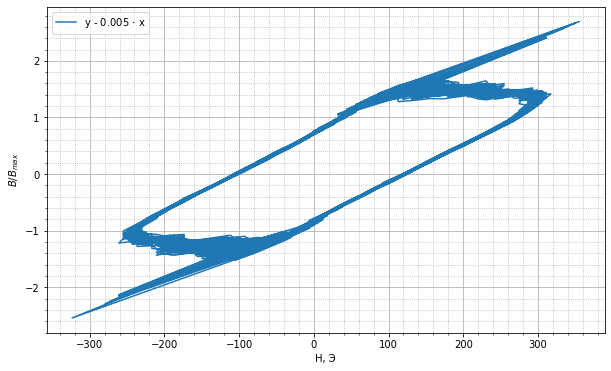

In [163]:
k = -0.005

plt.figure(figsize=(10,6))

# plt.plot(H_r, B_r, label='origin')
plt.plot(H_r, B_r - np.array([i * k for i in H_r]), label=r'y - 0.005 $\cdot$ x')

plt.xlabel('H, Э')
plt.ylabel(r'$B/B_{max}$')

plt.minorticks_on()
plt.grid(which='minor', linestyle=':')
plt.grid()
plt.legend()
plt.savefig('pictures/gr1.jpg', dpi=400)
plt.show()